In [1]:
import warnings
warnings.filterwarnings("ignore")
import scanpy as sc
import graph_tool.all as gt
import schist as scs
import pandas as pd
import anndata
import sklearn.metrics
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


# Analysis of sc-mixology dataset

This notebook shows the analysis of a cell mixture profiled by chromium 10x, as a part of the sc-mixology dataset. Data are parsed directly from the original repository.

In [2]:
sc.settings.verbosity=2
sc.set_figure_params(dpi_save=300)

In [3]:
# load the data and create the AnnData object
tdata = pd.read_table("https://github.com/LuyiTian/sc_mixology/raw/master/data/csv/sc_10x_5cl.count.csv.gz", sep=",")
metadata = pd.read_table("https://github.com/LuyiTian/sc_mixology/raw/master/data/csv/sc_10x_5cl.metadata.csv.gz", sep=",")
adata = anndata.AnnData(tdata.T)

metadata_cols = ['cell_line', 'cell_line_demuxlet', 'demuxlet_cls']
adata.obs = metadata.loc[:, metadata_cols]
for c in metadata_cols:
    adata.obs.loc[:, c] = pd.Categorical(adata.obs.loc[:, c])

Data are processed and filtered using widely-accepted parameters

In [4]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
mito_genes = adata.var_names.str.startswith('MT-') 
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1) 
adata.obs['n_counts'] = adata.X.sum(axis=1)
adata = adata[adata.obs['percent_mito'] < 0.05, :]
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.05, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])
sc.pp.scale(adata, max_value=10)

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
regressing out ['n_counts', 'percent_mito']
    finished (0:00:05)


Here we calculate the PCA embedding

In [5]:
sc.tl.pca(adata)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


In [6]:
bdata = adata.copy()

We build here different kNN graphs, using a different number of PCs and neighbors. Also, Leiden clustering is performed at decreasing resolutions.
(Output is suppressed here...)

In [9]:
res = [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1][::-1]
for n_pcs in [10, 20, 30, 40, 50]:
    for n_neighbors in range(5, 35, 5):
        sc.pp.neighbors(adata, n_pcs=n_pcs, n_neighbors=n_neighbors)
        sc.tl.umap(adata)
        for x in range(len(res)):
            scs.inference.leiden(adata, resolution=res[x], key_added=f'leiden_level_{1 + x}')
        scs.inference.nested_model(adata, random_seed=42)
        scs.io.write(adata, prefix=f'Tian/Tian_pc{n_pcs}_n{n_neighbors}_dcTrue')

computing neighbors
    using 'X_pca' with n_pcs = 10
    finished (0:00:00)
computing UMAP
    finished (0:00:01)
running Leiden clustering
    finished (0:00:04)
running Leiden clustering
    finished (0:00:02)
running Leiden clustering
    finished (0:00:02)
running Leiden clustering
    finished (0:00:02)
running Leiden clustering
    finished (0:00:02)
running Leiden clustering
    finished (0:00:02)
running Leiden clustering
    finished (0:00:02)
running Leiden clustering
    finished (0:00:01)
running Leiden clustering
    finished (0:00:01)
running Leiden clustering
    finished (0:00:01)
running Leiden clustering
    finished (0:00:02)
running Leiden clustering
    finished (0:00:02)
running Leiden clustering
    finished (0:00:02)
minimizing the nested Stochastic Block Model
    done (0:01:30)
    finished (0:01:30)
computing neighbors
    using 'X_pca' with n_pcs = 10
    finished (0:00:00)
computing UMAP
    finished (0:00:02)
running Leiden clustering
    finished (0:00:0

running Leiden clustering
    finished (0:00:22)
running Leiden clustering
    finished (0:00:14)
minimizing the nested Stochastic Block Model
    done (0:02:14)
    finished (0:02:14)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished (0:00:00)
computing UMAP
    finished (0:00:03)
running Leiden clustering
    finished (0:00:15)
running Leiden clustering
    finished (0:00:16)
running Leiden clustering
    finished (0:00:16)
running Leiden clustering
    finished (0:00:20)
running Leiden clustering
    finished (0:00:19)
running Leiden clustering
    finished (0:00:15)
running Leiden clustering
    finished (0:00:15)
running Leiden clustering
    finished (0:00:15)
running Leiden clustering
    finished (0:00:15)
running Leiden clustering
    finished (0:00:17)
running Leiden clustering
    finished (0:00:17)
running Leiden clustering
    finished (0:00:16)
running Leiden clustering
    finished (0:00:20)
minimizing the nested Stochastic Block Model
    done (0:02:23)

running Leiden clustering
    finished (0:00:04)
running Leiden clustering
    finished (0:00:03)
running Leiden clustering
    finished (0:00:03)
running Leiden clustering
    finished (0:00:03)
running Leiden clustering
    finished (0:00:03)
running Leiden clustering
    finished (0:00:04)
minimizing the nested Stochastic Block Model
    done (0:01:08)
    finished (0:01:08)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:00)
computing UMAP
    finished (0:00:02)
running Leiden clustering
    finished (0:00:09)
running Leiden clustering
    finished (0:00:09)
running Leiden clustering
    finished (0:00:09)
running Leiden clustering
    finished (0:00:05)
running Leiden clustering
    finished (0:00:09)
running Leiden clustering
    finished (0:00:05)
running Leiden clustering
    finished (0:00:05)
running Leiden clustering
    finished (0:00:06)
running Leiden clustering
    finished (0:00:13)
running Leiden clustering
    finished (0:00:12)
running Leiden

running Leiden clustering
    finished (0:00:23)
running Leiden clustering
    finished (0:00:24)
running Leiden clustering
    finished (0:00:24)
running Leiden clustering
    finished (0:00:25)
running Leiden clustering
    finished (0:00:20)
running Leiden clustering
    finished (0:00:20)
running Leiden clustering
    finished (0:00:19)
running Leiden clustering
    finished (0:00:20)
running Leiden clustering
    finished (0:00:25)
running Leiden clustering
    finished (0:00:24)
minimizing the nested Stochastic Block Model
    done (0:02:46)
    finished (0:02:47)


Once all results have been saved, load and look at conconrdance with given annotations

In [10]:
pcs = [10, 20, 30, 40, 50]
neighbors = range(5, 35, 5)
ARI_n = pd.DataFrame(0., index = neighbors, columns=pcs)
ARI_l = pd.DataFrame(0., index = neighbors, columns=pcs)
for n_pcs in pcs:
    for n_neighbors in neighbors:
        adata = scs.io.read(f"Tian/Tian_pc{n_pcs}_n{n_neighbors}_dcTrue")
        leiden_cols = [x for x in adata.obs_keys() if x.startswith('leiden_level')]
        nsbm_cols = [x for x in adata.obs_keys() if x.startswith('nsbm_level')]
        nsbm_ARI = np.array([sklearn.metrics.adjusted_rand_score(adata.obs.cell_line, adata.obs[x]) for x in nsbm_cols])
        ARI_n.loc[n_neighbors, n_pcs] = np.max(nsbm_ARI)
        leiden_ARI = np.array([sklearn.metrics.adjusted_rand_score(adata.obs.cell_line, adata.obs[x]) for x in leiden_cols])
        ARI_l.loc[n_neighbors, n_pcs] = np.max(leiden_ARI)

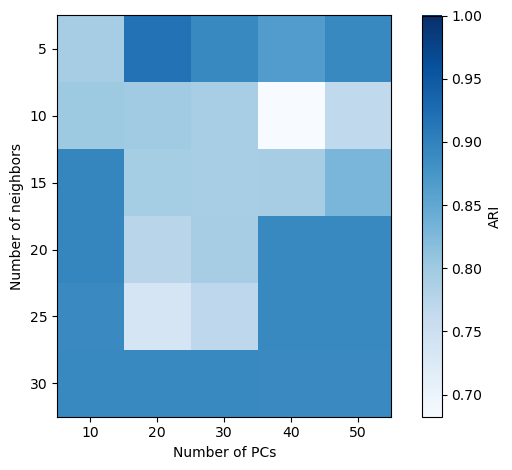

In [11]:
plt.rcdefaults()
mmin = np.min([np.min(ARI_n.values), np.min(ARI_l.values)])
imshow(ARI_n, cmap="Blues", vmin=mmin, vmax=1)
xticks(range(len(pcs)), pcs)
yticks(range(len(neighbors)), neighbors)
xlabel("Number of PCs")
ylabel("Number of neighbors")
colorbar(label="ARI", )
tight_layout()

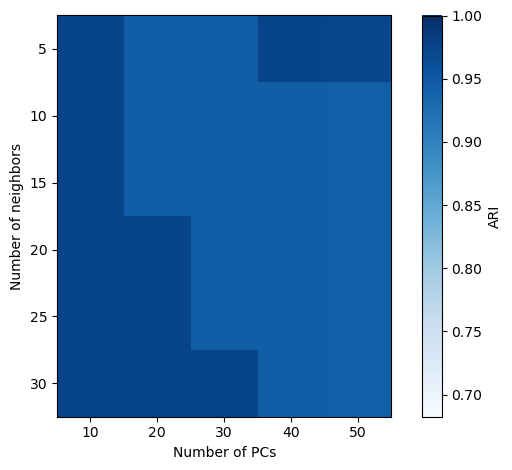

In [14]:
plt.rcdefaults()
mmin = np.min([np.min(ARI_n.values), np.min(ARI_l.values)])
imshow(ARI_l, cmap="Blues", vmin=mmin, vmax=1)
xticks(range(len(pcs)), pcs)
yticks(range(len(neighbors)), neighbors)
xlabel("Number of PCs")
ylabel("Number of neighbors")
colorbar(label="ARI", )
tight_layout()

We here take the 30 PC and 30 neighbor dataset

In [3]:
sc.set_figure_params(dpi_save=300)

In [4]:
adata = scs.io.read("Tian/Tian_pc50_n15_dcTrue")

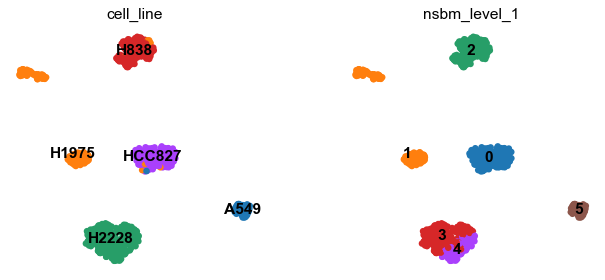

In [220]:
sc.pl.umap(adata, color=['cell_line', 'nsbm_level_1'], 
           legend_loc='on data', frameon=False)

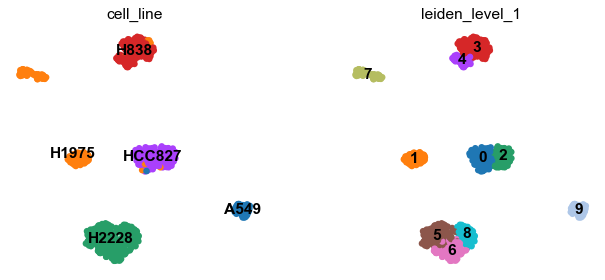

In [221]:
sc.pl.umap(adata, color=['cell_line', 'leiden_level_1'], 
           legend_loc='on data', frameon=False)

In [5]:
import SCCAF

In [74]:
y_prob, y_pred, y_test, clf, cvsm, acc = SCCAF.SCCAF_assessment(adata.X, adata.obs['cell_line'], n=100)


Mean CV accuracy: 0.9817
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9895


In [75]:
acc, cvsm

(0.9895397489539749, 0.9816814764183185)

In [76]:
adata.obs['NS1_Round0'] = adata.obs['nsbm_level_1']
SCCAF.SCCAF_optimize_all(min_acc=cvsm, ad=adata, basis ='umap',c_iter=5, use='pca', 
                         plot=False, prefix='NS1') # use='pca'


R1norm_cutoff: 0.500000
R2norm_cutoff: 0.050000
Accuracy: 0.000000
Round1 ...
Mean CV accuracy: 0.9788
Accuracy on the training set: 0.9976
Accuracy on the hold-out set: 0.9725
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9794
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9794
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9748
Accuracy on the training set: 0.9953
Accuracy on the hold-out set: 0.9771
Max R1mat: 0.083333
Max R2mat: 0.011737
min_acc: 0.972477
IGRAPH U-W- 6 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.083333
m2: 0.011737
Accuracy: 0.972477
R1norm_cutoff: 0.073333
R2norm_cutoff: 0.010737
Accuracy: 0.972477
Round1 ...
Mean CV accuracy: 0.9693
Accuracy on the training set: 0.9953
Accuracy on the hold-out set: 0.9931
Accuracy on the training set: 0.9976
Accuracy on the hold-out set: 0.9817
Accuracy on the training set: 0.9976
Accuracy on the hold-out set: 0.9748
Accuracy on the training

... storing 'NS1_Round0_self-projection' as categorical
... storing 'NS1_result' as categorical
... storing 'NS1_Round1' as categorical
... storing 'NS1_Round1_self-projection' as categorical


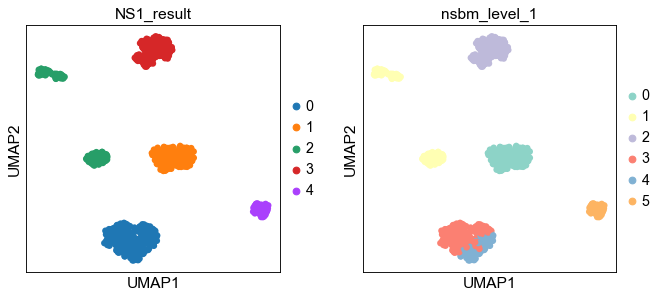

In [77]:
sc.pl.umap(adata, color=['NS1_result', 'nsbm_level_1'])

In [84]:
adata.obs['LE_Round0'] = adata.obs['leiden_level_1']
SCCAF.SCCAF_optimize_all(min_acc=cvsm, ad=adata, basis ='umap',c_iter=5, use='pca', 
                         plot=False, prefix='LE') # use='pca'



R1norm_cutoff: 0.500000
R2norm_cutoff: 0.050000
Accuracy: 0.000000
Round1 ...
Mean CV accuracy: 0.9443
Accuracy on the training set: 0.9954
Accuracy on the hold-out set: 0.9744
Accuracy on the training set: 0.9930
Accuracy on the hold-out set: 0.9767
Accuracy on the training set: 0.9954
Accuracy on the hold-out set: 0.9650
Accuracy on the training set: 0.9954
Accuracy on the hold-out set: 0.9464
Accuracy on the training set: 0.9977
Accuracy on the hold-out set: 0.9557
Max R1mat: 0.031250
Max R2mat: 0.002488
min_acc: 0.946387
IGRAPH U-W- 10 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.031250
m2: 0.002488
Accuracy: 0.946387
R1norm_cutoff: 0.021250
R2norm_cutoff: 0.001488
Accuracy: 0.946387
Round1 ...
Mean CV accuracy: 0.9467
Accuracy on the training set: 0.9954
Accuracy on the hold-out set: 0.9347
Accuracy on the training set: 0.9954
Accuracy on the hold-out set: 0.9534
Accuracy on the training set: 0.9884
Accuracy on the hold-out set: 0.9674
Accuracy on the trainin

... storing 'LE_Round0_self-projection' as categorical
... storing 'LE_result' as categorical
... storing 'LE_Round1' as categorical
... storing 'LE_Round1_self-projection' as categorical


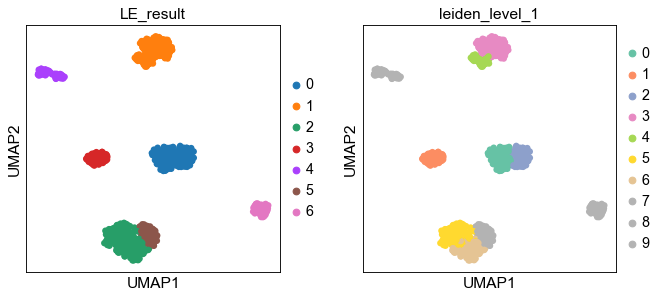

In [85]:
sc.pl.umap(adata, color=['LE_result', 'leiden_level_1'])

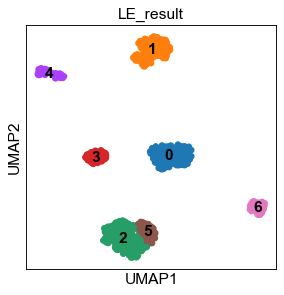

In [86]:
sc.pl.umap(adata, color='LE_result', legend_loc='on data')

## Reassign clusters according to published iteration

In [92]:
tmp_res=np.array(adata.obs['LE_result'].values)

In [94]:
tmp_res[tmp_res=='5'] = '0'
tmp_res[tmp_res=='2'] = '0'

In [95]:
adata.obs['LE_result'] = pd.Categorical(tmp_res)

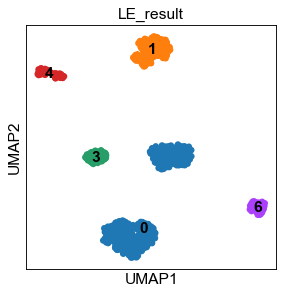

In [96]:
sc.pl.umap(adata, color='LE_result', legend_loc='on data')

In [98]:
adata.obs['LE_result'].cat.rename_categories(['0', '1', '2', '3', '4'], inplace=True)

In [60]:
cvsm

0.9790697674418605

In [30]:
sklearn.metrics.adjusted_rand_score(adata.obs['NS1_result'] ,adata.obs['cell_line']), sklearn.metrics.adjusted_rand_score(adata.obs['LE_result'] ,adata.obs['cell_line'])

(0.9727553251847719, 0.942280536591834)

In [31]:
sklearn.metrics.adjusted_rand_score(adata.obs['nsbm_level_1'] ,adata.obs['cell_line']), sklearn.metrics.adjusted_rand_score(adata.obs['leiden_level_1'] ,adata.obs['cell_line'])

(0.829483002139994, 0.5489139254290606)

In [14]:
scs.io.write(adata, "Tian/Tian_BMC")

In [15]:
len(adata.obs['leiden_level_1'].cat.categories)

10

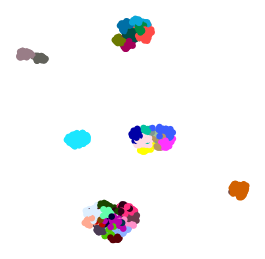

In [16]:
sc.pl.umap(adata, color='nsbm_level_0', 
           title='', 
           frameon=False, legend_loc='none', 
           save='Tian_NSBM0_mute.pdf')

In [17]:
adata.obs['NS0_Round0'] = adata.obs['nsbm_level_0']
SCCAF.SCCAF_optimize_all(min_acc=cvsm, ad=adata, basis ='umap',c_iter=20, use='pca', 
                         plot=False, prefix='NS0') # use='pca'



R1norm_cutoff: 0.500000
R2norm_cutoff: 0.050000
Accuracy: 0.000000
Round1 ...
Mean CV accuracy: 0.7477
Accuracy on the training set: 0.9699
Accuracy on the hold-out set: 0.7921
Accuracy on the training set: 0.9722
Accuracy on the hold-out set: 0.7944
Accuracy on the training set: 0.9630
Accuracy on the hold-out set: 0.7710
Accuracy on the training set: 0.9699
Accuracy on the hold-out set: 0.7757
Accuracy on the training set: 0.9676
Accuracy on the hold-out set: 0.7547
Accuracy on the training set: 0.9653
Accuracy on the hold-out set: 0.7874
Accuracy on the training set: 0.9792
Accuracy on the hold-out set: 0.7827
Accuracy on the training set: 0.9722
Accuracy on the hold-out set: 0.7664
Accuracy on the training set: 0.9630
Accuracy on the hold-out set: 0.7734
Accuracy on the training set: 0.9722
Accuracy on the hold-out set: 0.7734
Accuracy on the training set: 0.9745
Accuracy on the hold-out set: 0.7757
Accuracy on the training set: 0.9653
Accuracy on the hold-out set: 0.7710
Accuracy 

Accuracy on the training set: 0.9561
Accuracy on the hold-out set: 0.8197
Accuracy on the training set: 0.9515
Accuracy on the hold-out set: 0.8080
Accuracy on the training set: 0.9561
Accuracy on the hold-out set: 0.7963
Accuracy on the training set: 0.9584
Accuracy on the hold-out set: 0.7799
Max R1mat: 1.000000
Max R2mat: 0.010563
min_acc: 0.779859
IGRAPH U-W- 29 10 --
+ attr: weight (e)
+ edges:
0--4 0--12 0--20 0--27 0--4 0--12 13--16 13--16 0--20 0--27
Round4 ...
Mean CV accuracy: 0.8109
Accuracy on the training set: 0.9596
Accuracy on the hold-out set: 0.8319
Accuracy on the training set: 0.9571
Accuracy on the hold-out set: 0.8534
Accuracy on the training set: 0.9646
Accuracy on the hold-out set: 0.8427
Accuracy on the training set: 0.9621
Accuracy on the hold-out set: 0.8664
Accuracy on the training set: 0.9596
Accuracy on the hold-out set: 0.8211
Accuracy on the training set: 0.9571
Accuracy on the hold-out set: 0.8233
Accuracy on the training set: 0.9722
Accuracy on the hold

Accuracy on the training set: 0.9430
Accuracy on the hold-out set: 0.8608
Accuracy on the training set: 0.9649
Accuracy on the hold-out set: 0.7991
Accuracy on the training set: 0.9605
Accuracy on the hold-out set: 0.8434
Accuracy on the training set: 0.9737
Accuracy on the hold-out set: 0.8354
Max R1mat: 1.000000
Max R2mat: 0.035363
min_acc: 0.799051
IGRAPH U-W- 12 8 --
+ attr: weight (e)
+ edges:
0--3 0--4 0--6 0--11 0--3 0--4 0--6 0--11
Round9 ...
Mean CV accuracy: 0.8636
Accuracy on the training set: 0.9627
Accuracy on the hold-out set: 0.8798
Accuracy on the training set: 0.9627
Accuracy on the hold-out set: 0.8727
Accuracy on the training set: 0.9814
Accuracy on the hold-out set: 0.8484
Accuracy on the training set: 0.9689
Accuracy on the hold-out set: 0.8555
Accuracy on the training set: 0.9565
Accuracy on the hold-out set: 0.8670
Accuracy on the training set: 0.9565
Accuracy on the hold-out set: 0.8627
Accuracy on the training set: 0.9627
Accuracy on the hold-out set: 0.8598
Ac

In [18]:
len(adata.obs['nsbm_level_0'].cat.categories)

38

... storing 'NS0_Round0_self-projection' as categorical
... storing 'NS0_result' as categorical
... storing 'NS0_Round1' as categorical
... storing 'NS0_Round1_self-projection' as categorical
... storing 'NS0_Round2' as categorical
... storing 'NS0_Round2_self-projection' as categorical
... storing 'NS0_Round3' as categorical
... storing 'NS0_Round3_self-projection' as categorical
... storing 'NS0_Round4' as categorical
... storing 'NS0_Round4_self-projection' as categorical
... storing 'NS0_Round5' as categorical
... storing 'NS0_Round5_self-projection' as categorical
... storing 'NS0_Round6' as categorical
... storing 'NS0_Round6_self-projection' as categorical
... storing 'NS0_Round7' as categorical
... storing 'NS0_Round7_self-projection' as categorical
... storing 'NS0_Round8' as categorical
... storing 'NS0_Round8_self-projection' as categorical
... storing 'NS0_Round9' as categorical
... storing 'NS0_Round9_self-projection' as categorical
... storing 'NS0_Round10' as categorical

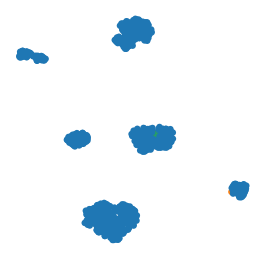

In [19]:
sc.pl.umap(adata, color='NS0_result', 
           title='', 
           frameon=False, legend_loc='none', 
           save='Tian_nSBM0_SSCAF_mute.png')

In [304]:
cvsm

0.9921394395078605

In [32]:
cvsm

0.9895078605604921

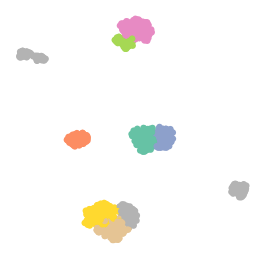

In [20]:
adata.uns['leiden_level_1_colors'] = [mpl.colors.to_hex(x) for x in cm.Set2(range(len(adata.obs['leiden_level_1'].cat.categories)))]
sc.pl.umap(adata, color='leiden_level_1', 
           title='', 
           frameon=False, legend_loc='none', 
           save='Tian_Leiden_mute.pdf')

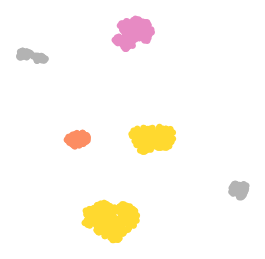

In [99]:
adata.uns['LE_result_colors'] = [adata.uns['leiden_level_1_colors'][x] for x in [5, 3, 1, 7, 9]]
sc.pl.umap(adata, color='LE_result', 
           title='', 
           frameon=False, legend_loc='none', 
           save='Tian_Leiden_SSCAF_mute.pdf')

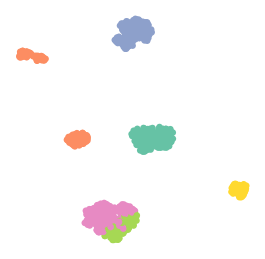

In [100]:
adata.uns['nsbm_level_1_colors'] = [mpl.colors.to_hex(x) for x in cm.Set2(range(len(adata.obs['nsbm_level_1'].cat.categories)))]
sc.pl.umap(adata, color='nsbm_level_1', 
           title='', 
           frameon=False, legend_loc='none', 
           save='Tian_NSBM_mute.pdf')

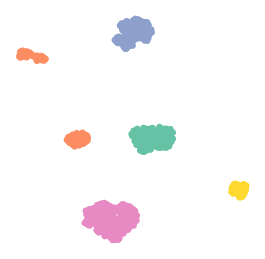

In [101]:
adata.uns['NS1_result_colors'] = [adata.uns['nsbm_level_1_colors'][x] for x in [3, 0, 1, 2, 5]]
sc.pl.umap(adata, color='NS1_result', 
           title='', 
           frameon=False, legend_loc='none', 
           save='Tian_nSBM_SSCAF_mute.pdf')

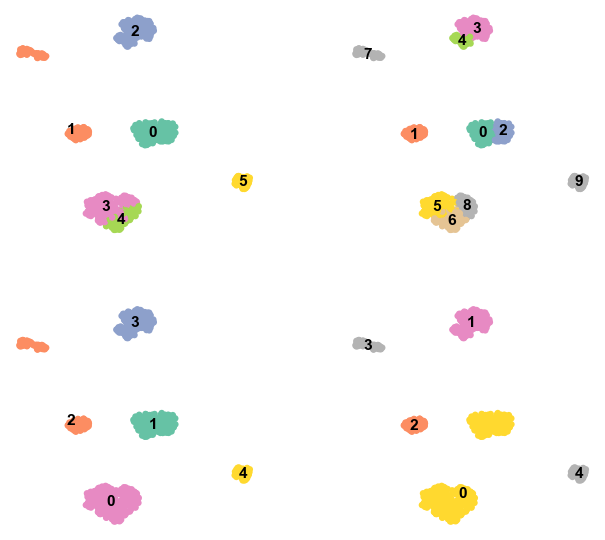

In [105]:
sc.pl.umap(adata, color=['nsbm_level_1', 'leiden_level_1',
                         'NS1_result', 'LE_result' ], 
           title=['', '', '', ''], 
           frameon=False, legend_loc='on data', ncols=2,
           save='Tian_BCDE.pdf')

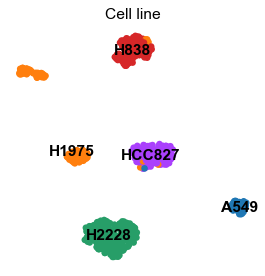

In [24]:
sc.pl.umap(adata, color='cell_line', 
           title='Cell line', 
           frameon=False, legend_loc='on data', 
           save='Tian_cell.pdf')

In [109]:
gs[]

GridSpec(2, 4)

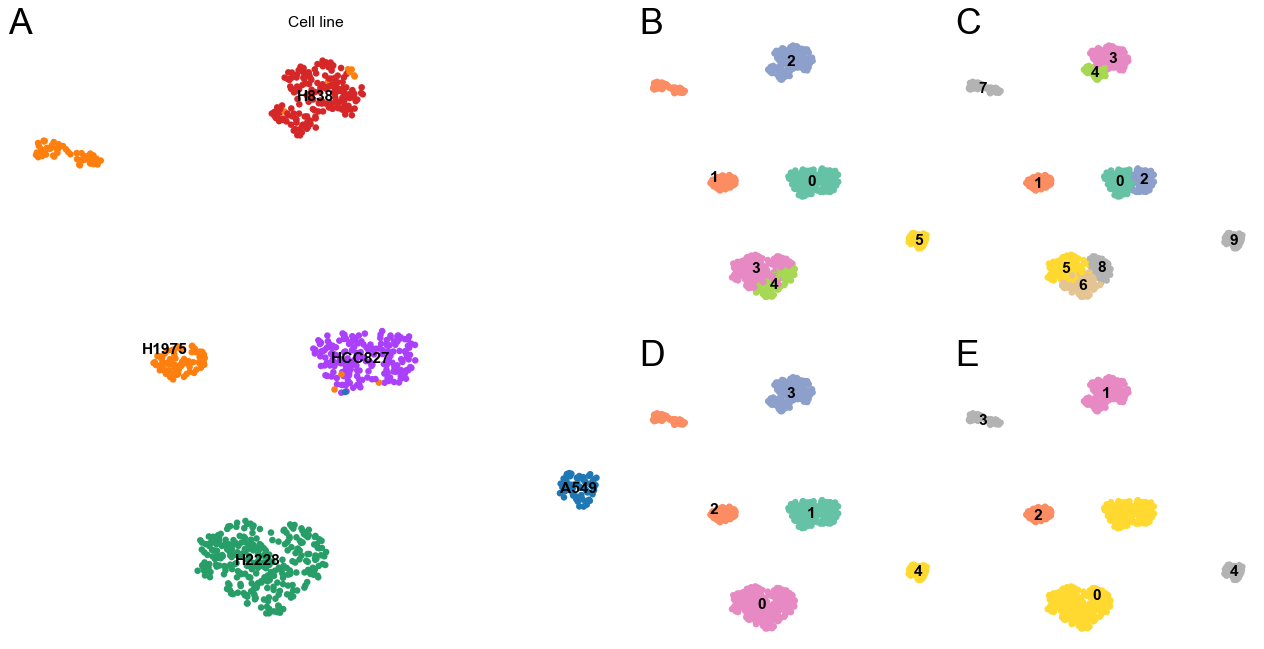

In [121]:
fig = plt.figure(constrained_layout=False, figsize=(20, 10))
gs = fig.add_gridspec(nrows=2, ncols=4, wspace=0.05)

cell_ax=fig.add_subplot(gs[:2, :2])
schist_cl=fig.add_subplot(gs[0, 2])
schist_scaf=fig.add_subplot(gs[1, 2])
leiden_cl=fig.add_subplot(gs[0, 3])
leiden_scaf=fig.add_subplot(gs[1, 3])


sc.pl.umap(adata, color=['cell_line'], legend_loc='on data', 
           frameon=False,  title=['Cell line',], ax=cell_ax, show=False
           )
cell_ax.text(0, 1, 'A', size=32, transform=cell_ax.transAxes)

sc.pl.umap(adata, color='nsbm_level_1', legend_loc='on data', 
           frameon=False,  title='', ax=schist_cl, show=False
           )
schist_cl.text(0, 1, 'B', size=32, transform=schist_cl.transAxes)



sc.pl.umap(adata, color='leiden_level_1', legend_loc='on data', 
           frameon=False, title='', ax=leiden_cl, show=False)
leiden_cl.text(0, 1, 'C', size=32, transform=leiden_cl.transAxes)

sc.pl.umap(adata, color='NS1_result', legend_loc='on data', 
           frameon=False,  title='', ax=schist_scaf, show=False
           )
schist_scaf.text(0, 1, 'D', size=32, transform=schist_scaf.transAxes)

sc.pl.umap(adata, color='LE_result', legend_loc='on data', 
           frameon=False,  title='', ax=leiden_scaf, show=False
           )
leiden_scaf.text(0, 1, 'E', size=32, transform=leiden_scaf.transAxes)

plt.tight_layout()
plt.show()

fig.savefig('FigureTian.pdf', dpi=300, transparent=True)



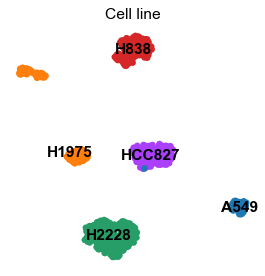

In [25]:
sc.pl.umap(adata, color='cell_line_demuxlet', 
           title='Cell line', 
           frameon=False, legend_loc='on data', 
           save='Tian_cell_demux.pdf')

In [241]:
adata.obs['max_l1'] = np.max(adata.obsm['CM_nsbm_level_1'], axis=1)

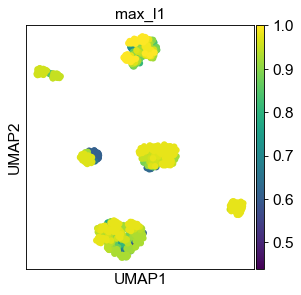

In [243]:
sc.pl.umap(adata, color='max_l1')

In [171]:
def NC_RMT(adata):
    x = adata.X
    n, p = adata.shape
    muTW = (np.sqrt(n - 1) + np.sqrt(p))**2
    sigmaTW = (np.sqrt(n - 1) + np.sqrt(p)) * (1 / np.sqrt(n - 1) + 1/np.sqrt(p))**(1/3)
    bd = 3.273 * sigmaTW + muTW
    return np.sum(np.linalg.eigvals(np.dot(x, x.T)) > bd)

In [172]:
NC_RMT(adata)

21

In [173]:
adata.uns['schist']['state']

<NestedBlockState object, with base <BlockState object with 50 blocks (38 nonempty), degree-corrected, for graph <Graph object, undirected, with 860 vertices and 9186 edges, at 0x7f8c26f65b50>, at 0x7f8c271ddf40>, and 11 levels of sizes [(860, 38), (38, 6), (6, 3), (3, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7f8c271d0310>

21 6 1 1


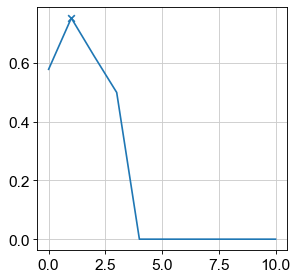

In [174]:
nc=0
N = NC_RMT(adata)
state = adata.uns['schist']['state']
L = np.argmin([np.abs(x.get_nonempty_B() - N) for x in state.get_levels()])
print(N, state.get_levels()[L].get_nonempty_B(), L, np.argmax(adata.uns['schist']['stats']['modularity']))
plot(adata.uns['schist']['stats']['modularity'], color=f'C{nc}')
scatter(L, adata.uns['schist']['stats']['modularity'][L], c=f'C{nc}', marker='x')

## Analysis of hierarchies at default parameters

In [175]:
str_markers = pd.read_table("Tian/cell_lines_STR.txt", index_col=0).astype(str)

In [176]:
import scipy.spatial
import scipy.cluster

In [177]:
def tanabe(cell1, cell2, amelogenin=False, dropna=True):
    # 2*number of shared alleles / (number of query alleles  + number of ref alleles)
    n_shared = 0
    n_query = 0
    n_ref = 0
    if dropna:
        mask = np.array([x != np.nan for x in cell1]) & np.array([x != np.nan for x in cell2])
        markers = cell1.index[mask]
    else:
        markers = cell1.index
    if not amelogenin:
        markers = [x for x in markers if not x == 'Amelogenin']
    for marker in markers:
        mq = set(cell1[marker].split(','))
        mr = set(cell2[marker].split(','))
        n_shared += len(mq.intersection(mr))
        n_query += len(mq)
        n_ref += len(mr)
    return 2*n_shared / (n_query + n_ref)

In [178]:
dm = []
cells = str_markers.columns
for x in range(len(cells) - 1):
    for y in range(x + 1, len(cells)):
        c1 = str_markers[cells[x]]
        c2 = str_markers[cells[y]]
        dm.append(tanabe(c1, c2, amelogenin=False, dropna=True))


dm = np.array(dm)
cell_dist = scipy.spatial.distance.squareform(1 - dm)
cell_sym =  scipy.spatial.distance.squareform(dm)
pd.DataFrame(cell_sym, index=cells, columns=cells).style.background_gradient()

,H1975,H838,HCC827,H2228,A549
H1975,0.000000,0.382979,0.304348,0.352941,0.274510
H838,0.382979,0.000000,0.097561,0.304348,0.260870
HCC827,0.304348,0.097561,0.000000,0.133333,0.177778
H2228,0.352941,0.304348,0.133333,0.000000,0.360000
A549,0.274510,0.260870,0.177778,0.360000,0.000000


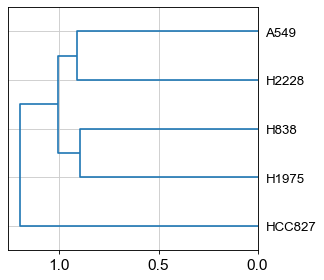

In [179]:
cl = scipy.cluster.hierarchy.average(cell_dist)
de = scipy.cluster.hierarchy.dendrogram(cl, orientation='left', labels=cells)

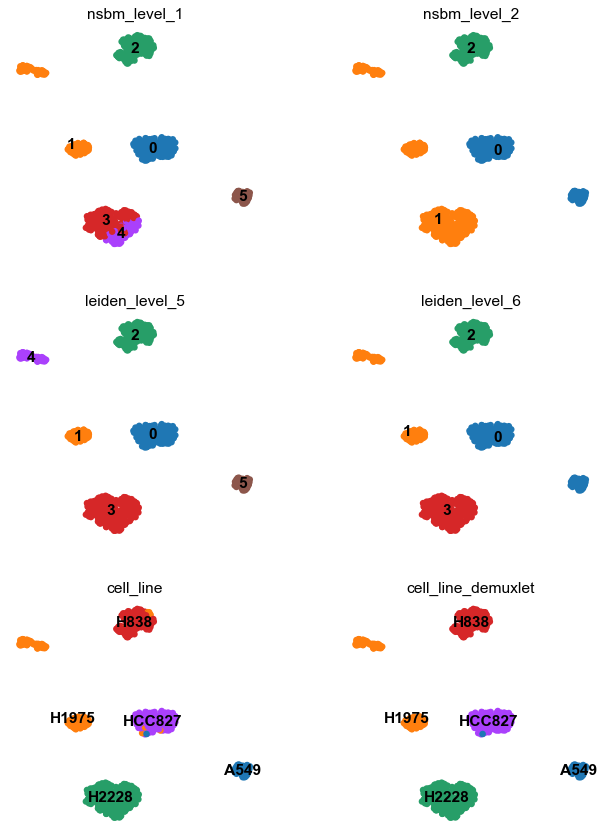

In [180]:
sc.pl.umap(adata, color=['nsbm_level_1', 'nsbm_level_2',
                        'leiden_level_5', 'leiden_level_6', 
                        'cell_line', 'cell_line_demuxlet'], 
          ncols=2, frameon=False, legend_loc='on data')

In [140]:
adata.obs[adata.obs['cell_line'] != adata.obs['cell_line_demuxlet']]

,cell_line,cell_line_demuxlet,demuxlet_cls,n_genes,percent_mito,n_counts,leiden_level_1,leiden_level_2,leiden_level_3,leiden_level_4,...,nsbm_level_1,nsbm_level_2,nsbm_level_3,nsbm_level_4,nsbm_level_5,nsbm_level_6,nsbm_level_7,nsbm_level_8,nsbm_level_9,nsbm_level_10
Lib90_00035,H1975,H838,DBL,6875,0.047248,61590.0,3,2,2,2,...,2,0,0,0,0,0,0,0,0,0
Lib90_00078,H1975,H838,DBL,5831,0.043457,59323.0,3,2,2,2,...,2,0,0,0,0,0,0,0,0,0
Lib90_00125,H1975,HCC827,DBL,6299,0.049787,55316.0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0
Lib90_00176,H1975,H838,DBL,6136,0.048365,49292.0,3,2,2,2,...,2,0,0,0,0,0,0,0,0,0
Lib90_00222,H1975,H838,DBL,5964,0.046619,44124.0,3,2,2,2,...,2,0,0,0,0,0,0,0,0,0
Lib90_00223,H1975,H838,DBL,5938,0.049360,48035.0,3,2,2,2,...,2,0,0,0,0,0,0,0,0,0
Lib90_00459,H1975,HCC827,DBL,5680,0.048347,40540.0,3,2,2,2,...,2,0,0,0,0,0,0,0,0,0
Lib90_01188,H1975,HCC827,DBL,4513,0.026193,32642.0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0
Lib90_01837,H1975,H838,DBL,5034,0.046017,25795.0,4,2,2,2,...,2,0,0,0,0,0,0,0,0,0
Lib90_02218,H1975,HCC827,SNG,3879,0.033186,23715.0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0


In [141]:
cells = adata.obs[adata.obs['cell_line'] != adata.obs['cell_line_demuxlet']].index
cm = pd.DataFrame(adata[cells].obsm['CM_nsbm_level_1'], index=cells,
                 columns=adata.obs['nsbm_level_1'].cat.categories)

In [142]:
cm.style.background_gradient(axis=1)

,0,1,2,3,4,5
Lib90_00035,0.020000,0.000000,0.960000,0.000000,0.000000,0.000000
Lib90_00078,0.020000,0.000000,0.960000,0.000000,0.000000,0.000000
Lib90_00125,0.040000,0.000000,0.000000,0.000000,0.000000,0.960000
Lib90_00176,0.020000,0.000000,0.960000,0.000000,0.000000,0.000000
Lib90_00222,0.020000,0.000000,0.960000,0.000000,0.000000,0.000000
Lib90_00223,0.020000,0.000000,0.960000,0.000000,0.000000,0.000000
Lib90_00459,0.020000,0.000000,0.890000,0.000000,0.000000,0.000000
Lib90_01188,0.040000,0.000000,0.000000,0.000000,0.000000,0.940000
Lib90_01837,0.020000,0.000000,0.980000,0.000000,0.000000,0.000000
Lib90_02218,0.040000,0.000000,0.000000,0.000000,0.000000,0.950000


In [102]:
scs.tl.calculate_affinity(adata, group_by='cell_line_demuxlet')

In [103]:
adata[cells].obs[['nsbm_level_1', 'cell_line', 
                  'cell_line_demuxlet']]

,nsbm_level_1,cell_line,cell_line_demuxlet
Lib90_00035,2,H1975,H838
Lib90_00078,2,H1975,H838
Lib90_00125,5,H1975,HCC827
Lib90_00176,2,H1975,H838
Lib90_00222,2,H1975,H838
Lib90_00223,2,H1975,H838
Lib90_00459,2,H1975,HCC827
Lib90_01188,5,H1975,HCC827
Lib90_01837,2,H1975,H838
Lib90_02218,5,H1975,HCC827


In [106]:
scs.tl.calculate_affinity(adata, group_by='cell_line')
cm = pd.DataFrame(adata[cells].obsm['CA_cell_line'], index=cells,
                 columns=adata.obs['cell_line'].cat.categories)

In [107]:
cm.style.background_gradient(axis=1)

,A549,H1975,H2228,H838,HCC827
Lib90_00035,0.000000,0.000056,0.000000,0.999944,0.000000
Lib90_00078,0.000000,0.000000,0.000000,1.000000,0.000000
Lib90_00125,0.000000,0.000000,0.000000,0.000000,1.000000
Lib90_00176,0.000000,0.000000,0.000000,1.000000,0.000000
Lib90_00222,0.000000,0.000000,0.000000,1.000000,0.000000
Lib90_00223,0.000000,0.000000,0.000000,1.000000,0.000000
Lib90_00459,0.000000,0.000000,0.000000,1.000000,0.000000
Lib90_01188,0.000000,0.000000,0.000000,0.000000,1.000000
Lib90_01837,0.000000,0.000000,0.000000,1.000000,0.000000
Lib90_02218,0.000000,0.000000,0.000000,0.000000,1.000000


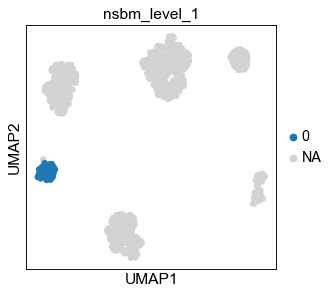

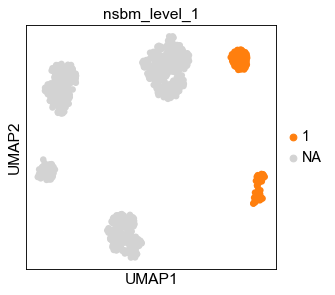

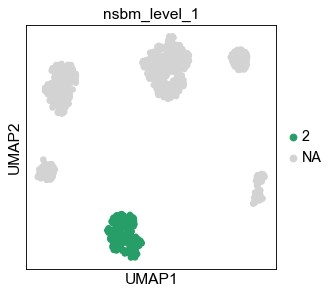

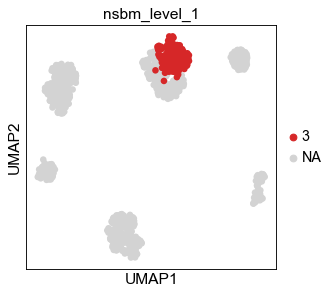

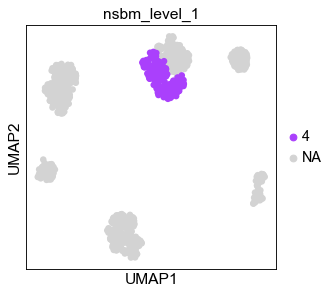

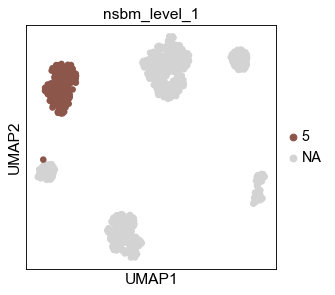

In [108]:
for g in adata.obs['nsbm_level_1'].cat.categories:
    sc.pl.umap(adata, color='nsbm_level_1', groups=g)

In [310]:
N = adata.shape[0]
N = 5000
print(N /np.log(N), np.sqrt(N))

587.047855746548 70.71067811865476
